# Anime Rating Analysis

## Context

Content on the movie portal is rated by the viewers. The movie portal also provides other information for each anime like the duration, number of people who have watched it,etc.

We want to identify the most important factors involved in rating an anime. You objective is to identify the important factors that influence a rating and building a predictive model to predict the rating on an anime.


## Objective

To analyze the data and build a linear regression model to predict the ratings of anime.


## Key Questions

1. What are the key factors influencing the rating an anime?
2. Can we build a good predictive model for rating an anime? What needs to be part of the performance assessment for the model?


## Data Information



**Data Dictionary**

- title - the title of anime
- description - the synopsis of the plot
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode in minutes
- ongoing - whether it is ongoing
- sznOfRelease - the season of release (Winter, Spring, Fall)
- years_running - number of years the anime ran/is running
- studio_primary - primary studio of production
- studios_colab - whether there was a collaboration between studios to produce the anime
- contentWarn - whether anime has a content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating
- tag_Based_on_a_Manga - whether the anime is based on a manga
- tag_Comedy - whether the anime is of Comedy genre
- tag_Action - whether the anime is of Action genre
- tag_Fantasy - whether the anime is of Fantasy genre
- tag_Sci_Fi - whether the anime is of Sci-Fi genre
- tag_Shounen - whether the anime has a tag Shounen
- tag_Original_Work - whether the anime is an original work
- tag_Non_Human_Protagonists - whether the anime has any non-human protagonists
- tag_Drama - whether the anime is of Drama genre
- tag_Adventure - whether the anime is of Adventure genre
- tag_Family_Friendly - whether the anime is family-friendly
- tag_Short_Episodes - whether the anime has short episodes
- tag_School_Life - whether the anime is regarding school life
- tag_Romance - whether the anime is of Romance genre
- tag_Shorts - whether the anime has a tag Shorts
- tag_Slice_of_Life - whether the anime has a tag Slice of Life
- tag_Seinen - whether the anime has a tag Seinen
- tag_Supernatural - whether the anime has a tag Supernatural
- tag_Magic - whether the anime has a tag Magic
- tag_Animal_Protagonists - whether the anime has animal protagonists
- tag_Ecchi - whether the anime has a tag Ecchi
- tag_Mecha - whether the anime has a tag Mecha
- tag_Based_on_a_Light_Novel - whether the anime is based on a light novel
- tag_CG_Animation - whether the anime has a tag CG Animation
- tag_Superpowers - whether the anime has a tag Superpowers
- tag_Others - whether the anime has other tags
- tag_is_missing - whether tag is missing or not

## Functions

In [219]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Import necessary libraries

In [222]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [224]:
# loading the dataset
# import the reviews into a dataframe - use your directory
import pandas as pd
df = pd.read_csv('Data/anime_data.csv')

In [226]:
# checking shape of the data
df.shape

(12101, 44)

In [228]:
# to view first 5 rows of the dataset
df.head(5)

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,0,58831.0,1453,21733,124,4.663,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,3217,7864,174,4.650,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [230]:
# to view last 5 rows of the dataset
df.tail(5)

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
12096,Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...,Princess Vanilla is a princess in a land of ic...,Movie,1,NaN,False,is_missing,0,TMS Entertainment,0,0,22.0,1,29,1,2.807,10,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12097,Hulaing Babies Petit,NaN,TV,12,5.0,False,Winter,0,Others,0,0,13.0,10,77,2,2.090,10,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12098,Marco & The Galaxy Dragon,NaN,OVA,1,NaN,False,is_missing,0,is_missing,0,0,17.0,0,65,0,2.543,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12099,Xing Chen Bian 2nd Season,Second season of Xing Chen Bian.,Web,3,24.0,True,is_missing,0,is_missing,0,0,40.5,31,22,0,3.941,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12100,Ultra B: Black Hole kara no Dokusaisha BB!!,NaN,Movie,1,20.0,False,is_missing,0,Shin-Ei Animation,0,0,15.0,1,19,1,2.925,10,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [232]:
# let's create a copy of the data to avoid any changes to original data
df_duplicate = df.copy()

In [234]:
# checking for duplicate values in the data
# Check for duplicated values
df.duplicated().sum()

0

- There are no duplicate values in the data.

In [237]:
# checking the names of the columns in the data

In [239]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

In [241]:
# Drop title feature
df.drop(['title'], axis=1, inplace=True)

#### Most columns are complete and withour nulls and are withe int64 or float64
#### There are a small number of object based columns and 2 columns which contain nulls.

**Let's check for missing values in the data.**

#### Display Nulls Function

In [246]:
## Displays all nulls in Data Frame with percentage relative to total column count
def display_nulls_info(df, show_all_columns=False):
    """
    Display the count and percentage of null values for each column in a DataFrame.
    
    Parameters:
    - df: pandas DataFrame to analyze.
    - show_all_columns: boolean, optional (default=False). If True, show information for all columns,
                        including those without null values. If False, only show columns with null values.
    """
    # Get the count of null values in each column
    null_counts = df.isnull().sum()
    
    # Optionally filter out columns that don't have any null values
    if not show_all_columns:
        null_counts = null_counts[null_counts > 0]
    
    # Calculate the percentage of total values that are null for each column
    null_percentage = (null_counts / len(df)) * 100
    
    # Combine the counts and percentages into a DataFrame for a clearer overview
    null_info = pd.DataFrame({'Null Count': null_counts, 'Percentage': null_percentage})
    
    # Display the DataFrame
    if null_info.empty:
        print("No null values found." if not show_all_columns else "No null values found in columns with nulls.")
    else:
        print(null_info)

# Example usage:
# display_nulls_info(df)
# To include all columns in the output, including those without null values:
# display_nulls_info(df, show_all_columns=True)


#### Display Nulls

In [248]:
# checking for missing values in the data
display_nulls_info(df)
print(df.shape)

             Null Count  Percentage
description        4468   36.922568
duration           4636   38.310883
(12101, 43)


Description and Duration have Large number of nulls. Description is not useful in this non-NLP model.

In [250]:
# Drop description feature
df.drop(['description'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


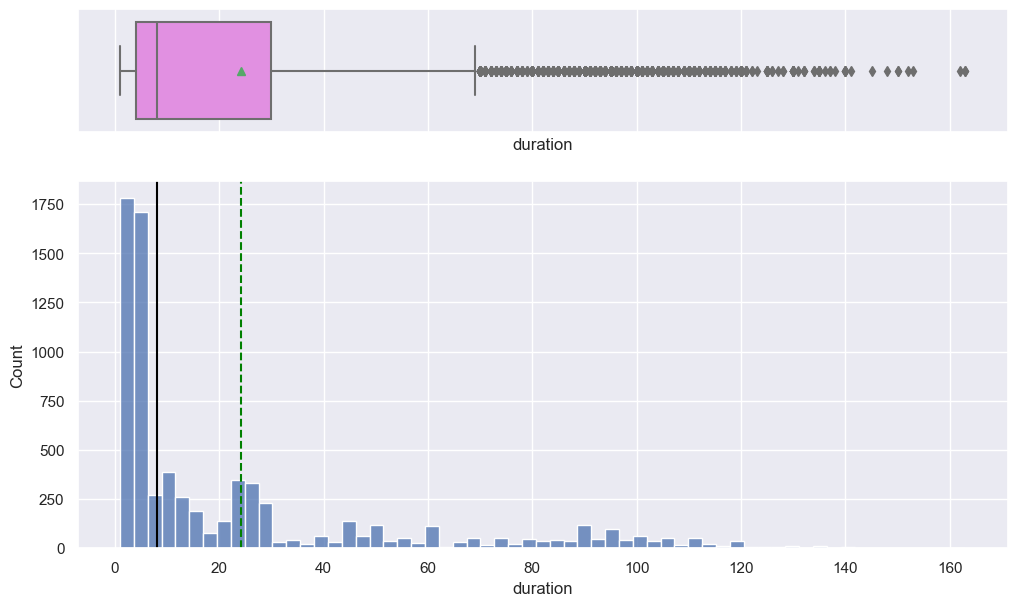

In [251]:
# View Duration Data
histogram_boxplot(df, "duration")

Duration data is heavily skewed right. Will leave outliers for now and imput nulls as median.

In [253]:
# IMPUTE NULLS AS MEDIAN VALUE
def impute_median(df, column):
    # Check if the column contains only numeric data
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate the median of the column, ignoring NaNs
        median = df[column].median()
        
        # Count the number of nulls in the column before imputation
        null_count_before = df[column].isnull().sum()
        
        # Impute the median value for all null values in the column
        df[column].fillna(median, inplace=True)
        
        # Print the number of nulls imputed and the median value used
        if null_count_before > 0:
            print(f"Column '{column}': Imputed {null_count_before} nulls with median value {median}.")
        else:
            print(f"Skipped. No nulls to impute in: {column}")
    else:
        # Print the name of the column that was skipped because it's not numeric
        print(f"Skipped non-numeric column: {column}")
    
    return df

# Example usage
# df = impute_median(df, 'COLUMN_TO_IMPUTE')


In [254]:
# Call function to impute using median
df = impute_median(df, 'duration')

Column 'duration': Imputed 4636 nulls with median value 8.0.


In [255]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,12101.0,18.012230,25.944225,1.000,5.000,8.000,15.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


#### Descriptions
- The Tag Columns are all boolean (1 or 0).
- Some data looks very skewed, such as eps
- ACTION: Review do Bivariate and Univariate Exportation


**Let's look at the non-numeric columns.**

In [258]:
# filtering non-numeric columns
cat_columns = df.select_dtypes(exclude=np.number).columns
cat_columns

Index(['mediaType', 'ongoing', 'sznOfRelease', 'studio_primary'], dtype='object')

In [259]:
# we will skip the title and description columns as they will have a lot of unique values
cat_col = ["mediaType", "ongoing", "sznOfRelease", "studio_primary"]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

mediaType
TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
is_missing       63
Name: count, dtype: int64
--------------------------------------------------
ongoing
False    11986
True       115
Name: count, dtype: int64
--------------------------------------------------
sznOfRelease
is_missing    8554
Spring        1135
Fall          1011
Winter         717
Summer         684
Name: count, dtype: int64
--------------------------------------------------
studio_primary
Others                  4340
is_missing              3208
Toei Animation           636
Sunrise                  430
J.C. Staff               341
MADHOUSE                 337
TMS Entertainment        317
Production I.G           271
Studio Deen              260
Studio Pierrot           221
OLM                      210
A-1 Pictures             194
AIC                      167
Shin-Ei Animation        164
Nippon Anima

Most Importantly, is_missing is a high count entry in studio_primary and sznOfRelease and is also present in MediaType.

#### mediaType
- is_missing = 63 entries
- ACTION: replace is_meaning with mode TV

#### on_going
- 99% of values are = False
- ACTION: Drop Feature

#### sznOfRelease
- is_missing = 8554 (70% of all entries)
- ACTION: Keep Feature (Highly Consider Dropping at Model Run)

#### studio_primary
- is_missing + Others = 7548 (62% of all entries)
- thoughts, these could be smaller independant studios with less popular releases and therefore be valueable as categories.
- ACTION: Keep Feature (for now)



In [261]:
# Replace is_missing with TV
df['mediaType'] = df['mediaType'].replace('is_missing', 'TV')
# Drop ongoing feature
df.drop(['ongoing'], axis=1, inplace=True)

In [262]:
# Review DF Changes
for column in cat_col:
    if column in df:
        print(df[column].value_counts())
        print("-" * 50)

mediaType
TV             4056
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
Name: count, dtype: int64
--------------------------------------------------
sznOfRelease
is_missing    8554
Spring        1135
Fall          1011
Winter         717
Summer         684
Name: count, dtype: int64
--------------------------------------------------
studio_primary
Others                  4340
is_missing              3208
Toei Animation           636
Sunrise                  430
J.C. Staff               341
MADHOUSE                 337
TMS Entertainment        317
Production I.G           271
Studio Deen              260
Studio Pierrot           221
OLM                      210
A-1 Pictures             194
AIC                      167
Shin-Ei Animation        164
Nippon Animation         145
Tatsunoko Production     144
DLE                      130
GONZO                    124
Bones                    121
Sh

### We will drop the missing values in the dataset.

In [264]:
# data.dropna(inplace=True)
# data.shape

## Data Visualization

### Univariate Analysis

### histograms and boxplots of the various columns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


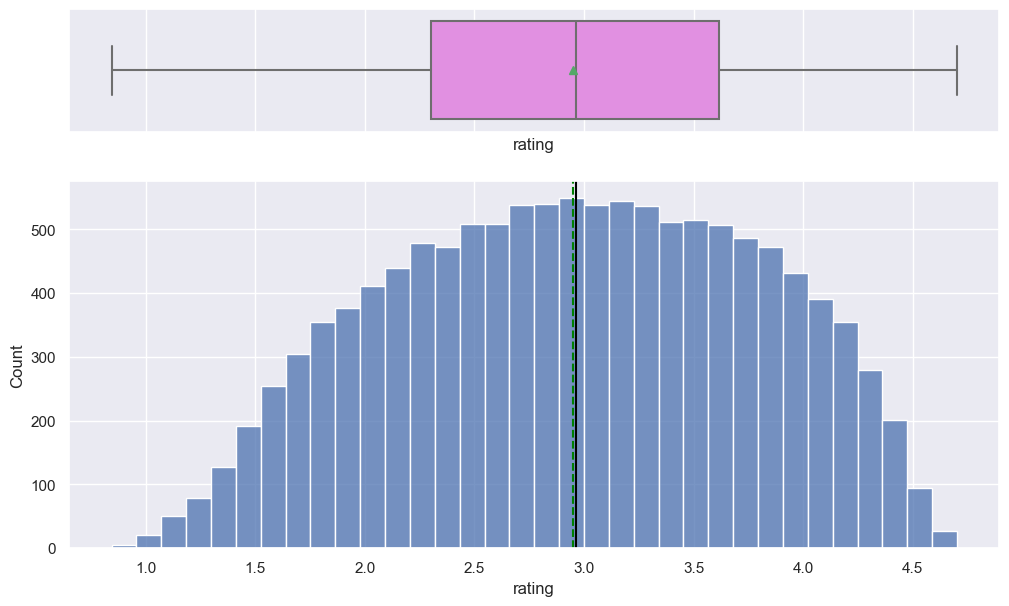

In [268]:
histogram_boxplot(df, "rating")

The Ratings Feature is relatively well distributed with only a slight leftward skew.

### next column...repeat

In [271]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,  # Assign the feature to hue as well
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### `mediaType`

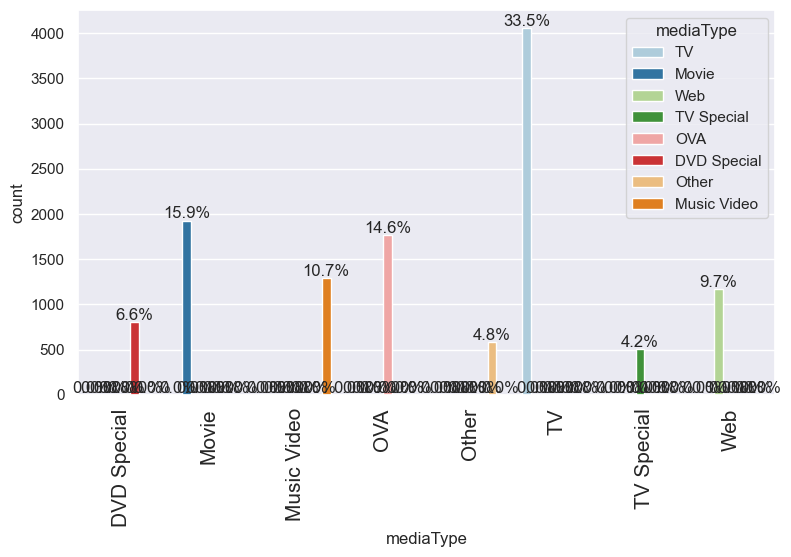

In [273]:
labeled_barplot(df, "mediaType", perc=True)

As can be seen in the earlier column .value_counts, the TV category has the most entries and then various levels of distribution on other categories.

### repeat the process for columns with similar data format

In [276]:
# creating a list of tag columns
tag_cols = [item for item in df.columns if "tag" in item]

# printing the number of occurrences of each unique value in each categorical column
for column in tag_cols:
    print(df[column].value_counts())
    print("-" * 50)

tag_Based_on_a_Manga
0    8582
1    3519
Name: count, dtype: int64
--------------------------------------------------
tag_Comedy
0    8799
1    3302
Name: count, dtype: int64
--------------------------------------------------
tag_Action
0    9303
1    2798
Name: count, dtype: int64
--------------------------------------------------
tag_Fantasy
0    9904
1    2197
Name: count, dtype: int64
--------------------------------------------------
tag_Sci_Fi
0    10089
1     2012
Name: count, dtype: int64
--------------------------------------------------
tag_Shounen
0    10348
1     1753
Name: count, dtype: int64
--------------------------------------------------
tag_Original_Work
0    10465
1     1636
Name: count, dtype: int64
--------------------------------------------------
tag_Non_Human_Protagonists
0    10740
1     1361
Name: count, dtype: int64
--------------------------------------------------
tag_Drama
0    10817
1     1284
Name: count, dtype: int64
-----------------------------------

Almost all of the Features are imbalanced with a far higher number of entries having a 0 value.

### Bivariate analysis

**We will not analyze the *tag* columns for correlation check as they have only 0 or 1 values.**

In [280]:
# Sort Rating to be First Column
column_name = 'rating'  # Replace 'your_column_name_here' with the actual column name
columns = [column_name] + [col for col in df.columns if col != column_name]
df = df[columns]

In [281]:
# creating a list of non-tag columns
corr_cols = [item for item in df.columns if "tag" not in item]
print(corr_cols)

['rating', 'mediaType', 'eps', 'duration', 'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'votes']


#### Heatmap Function

In [283]:
def plot_correlation_heatmap(df, df_name, set_size=12):
    """
    Plots a correlation heatmap of the given DataFrame.

    Parameters:
    - df: pandas DataFrame for which to plot the correlation heatmap.
    - df_name: String, the name of the DataFrame to include as the title of the heatmap.
    """
    plt.style.use('default')
    target_feature = df.columns[0]

    # Compute the correlation matrix
    corr_matrix = df.corr(numeric_only=True)

    # Get the absolute correlation with the target, sort by this correlation,
    # then drop the target itself to avoid self-correlation in the sorting index
    sorted_features = corr_matrix[target_feature].abs().sort_values(ascending=False).index

    # Reorder the correlation matrix based on the sorted features
    sorted_corr_matrix = corr_matrix.reindex(index=sorted_features, columns=sorted_features)

    # Plot the heatmap
    plt.figure(figsize=(set_size, set_size))
    heatmap = sns.heatmap(sorted_corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
    plt.title(f"Correlation Heatmap for {df_name}", fontsize=14)
    plt.show()

# Example usage:
# Assuming 'df_model_master' is your DataFrame and 'DataFrameName' is the name you want to give it
# plot_correlation_heatmap(df_model_master, 'DataFrameName')


#### Plot Heatmap from Function

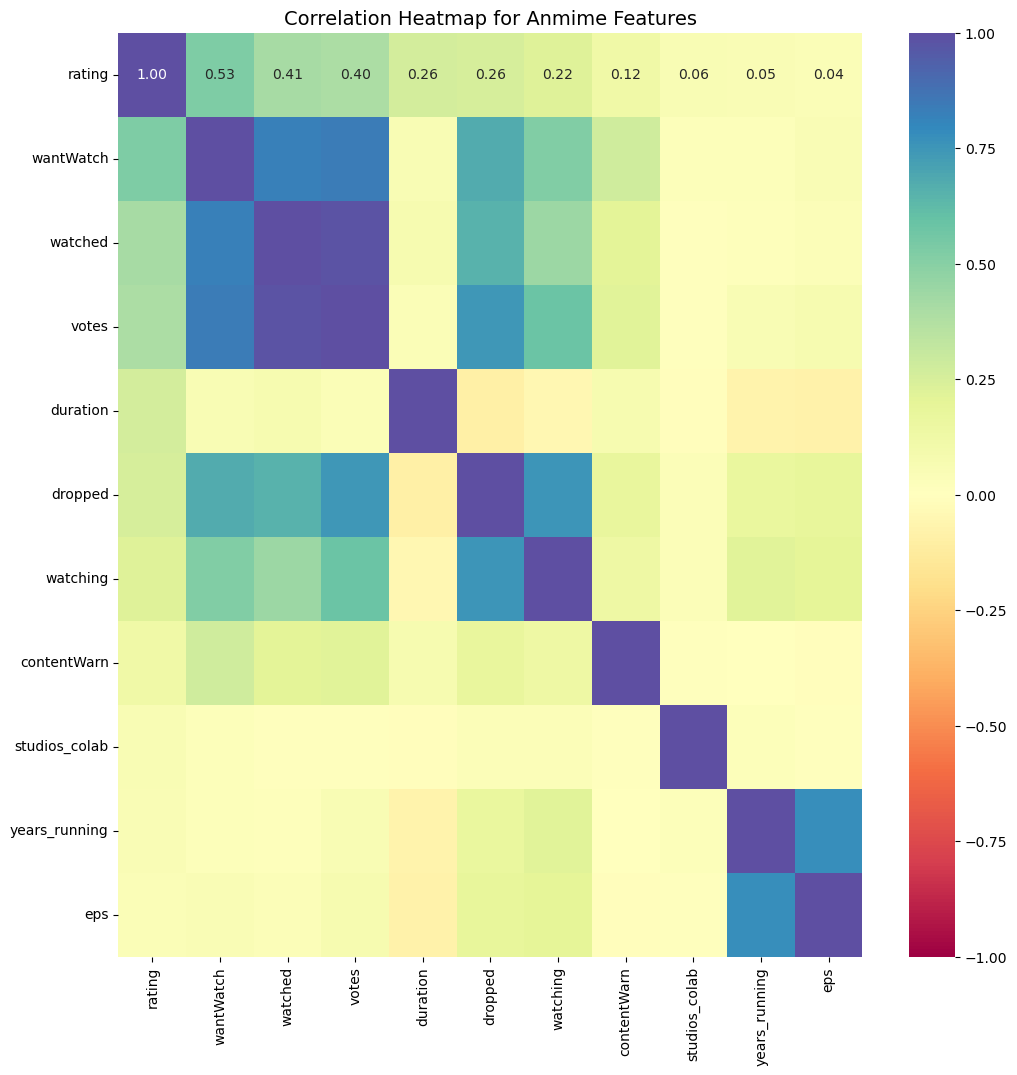

In [285]:
plot_correlation_heatmap(df[corr_cols], 'Anmime Features')

The Strongest Correlations to rating are wantWatch, duration, watched, and votes at 53%, 48%, 41%, 40% respectively.

### Check the variation of the dependent variable `rating` with some of the categorical columns in our data

### `mediaType` vs `rating`

### try some more vs rating

In [290]:
corr_cols_cat = ['rating']
for column in df[corr_cols]:
    if df[column].dtype == object:
        corr_cols_cat.append(column)


print(corr_cols_cat)

['rating', 'mediaType', 'sznOfRelease', 'studio_primary']


In [291]:
for column in df[corr_cols_cat]:
    print(df[column].nunique())

3305
8
5
22


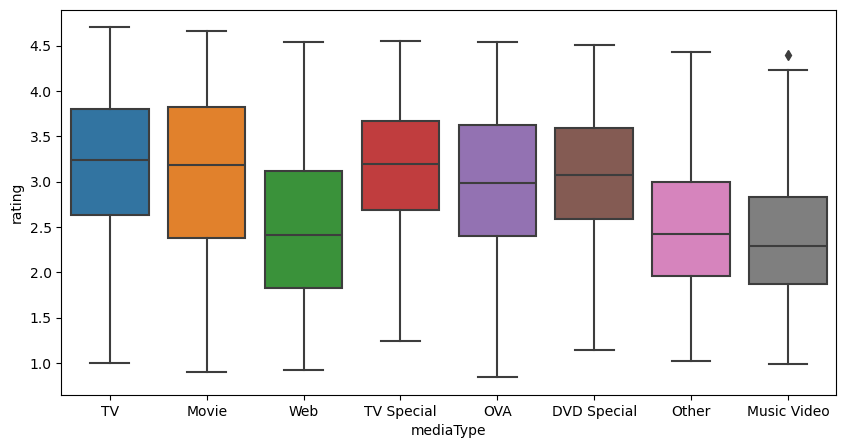

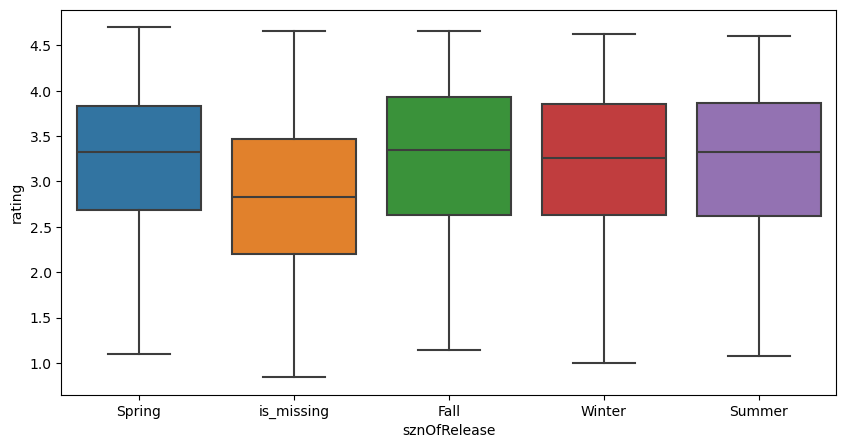

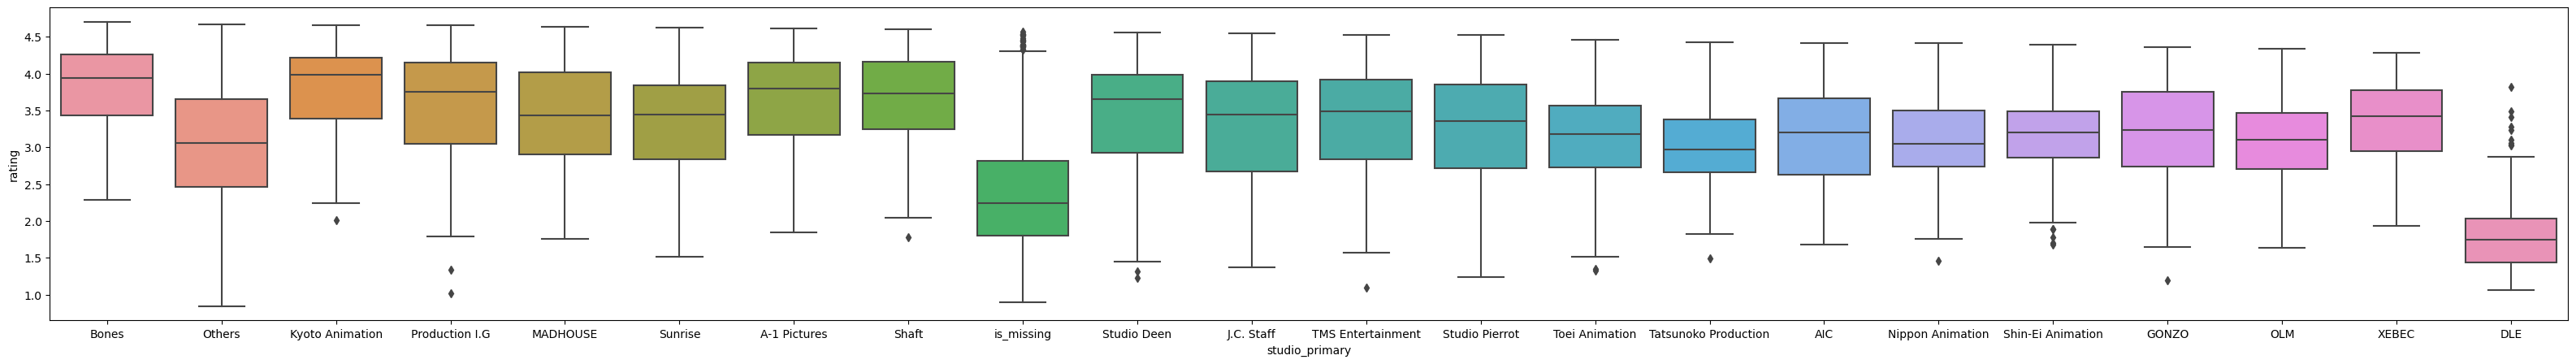

In [292]:
for column in df[corr_cols_cat]:
    if column != 'rating':
        if column != 'studio_primary':
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=column, y="rating", data=df)
            plt.show()
        else:
            plt.figure(figsize=(40, 5))
            sns.boxplot(x=column, y="rating", data=df)
            plt.show()

### Category Correlations 

#### mediaType
- Web, Other, and Music Video are standouts for having the lowest average ratings in the

#### sznOfRelease
- The is_missing category is a single standout feature predicting lower rating. Technically this likely has nothing to do with seasons, but rather media that does not have a dertermined or entered season is less likely to get a good rating.

#### studio_primary
- Again is_missing is a predictor of low movie ratings. This might be a pattern that moves forward with future data collection and could be useful OR this is data collection failure that will not be repeated into the future and therefore this might be a much less vaulable or unusable feature. DLE is notebly a poorly rated studio :(


#### Encode Features 'mediaType', 'sznOfRelease', and 'studio_primary'

In [295]:
# Initialize a global dictionary to store mappings for each encoded column
column_mappings = {}

# Encode Categorical Features
def encode_column(df, column_name, drop_orig_columns=False):
    global column_mappings  # Reference the global dictionary
    
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame. Skipping...")
        return df
    
    # Get unique values and sort them to ensure consistent mapping
    unique_values = sorted(df[column_name].unique())
    
    # Create a mapping dictionary from unique value to an integer code
    mapping_dict = {val: idx for idx, val in enumerate(unique_values)}
    
    # Create the encoded column name
    encoded_column_name = f'encoded_{column_name}'
    
    # Apply the mapping to create a new encoded column
    df[encoded_column_name] = df[column_name].replace(mapping_dict)
    
    # Drop the original column
    if drop_orig_columns == True:
        df.drop(columns=[column_name], inplace=True)
    
    # Store the mapping using the encoded column name as a reference
    column_mappings[encoded_column_name] = mapping_dict

    print(f"Created encoded_{column}")
    print(f"Encoded as {column_mappings[encoded_column_name]}")
    print()

    return df

# Example usage
# Assuming 'df' is your DataFrame and 'column_to_encode' is the column you want to encode
# df = encode_column(df, 'education_level')
# print(column_mappings['education_level'])  # Access the stored mapping


In [296]:
# Create list of columns to encode
Encode_Categorical_Features = ['mediaType', 'sznOfRelease', 'studio_primary']

# Run Encode Function
for column in Encode_Categorical_Features:
    df = encode_column(df, column, drop_orig_columns=True)

Created encoded_mediaType
Encoded as {'DVD Special': 0, 'Movie': 1, 'Music Video': 2, 'OVA': 3, 'Other': 4, 'TV': 5, 'TV Special': 6, 'Web': 7}

Created encoded_sznOfRelease
Encoded as {'Fall': 0, 'Spring': 1, 'Summer': 2, 'Winter': 3, 'is_missing': 4}

Created encoded_studio_primary
Encoded as {'A-1 Pictures': 0, 'AIC': 1, 'Bones': 2, 'DLE': 3, 'GONZO': 4, 'J.C. Staff': 5, 'Kyoto Animation': 6, 'MADHOUSE': 7, 'Nippon Animation': 8, 'OLM': 9, 'Others': 10, 'Production I.G': 11, 'Shaft': 12, 'Shin-Ei Animation': 13, 'Studio Deen': 14, 'Studio Pierrot': 15, 'Sunrise': 16, 'TMS Entertainment': 17, 'Tatsunoko Production': 18, 'Toei Animation': 19, 'XEBEC': 20, 'is_missing': 21}



In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rating                      12101 non-null  float64
 1   eps                         12101 non-null  int64  
 2   duration                    12101 non-null  float64
 3   years_running               12101 non-null  int64  
 4   studios_colab               12101 non-null  int64  
 5   contentWarn                 12101 non-null  int64  
 6   watched                     12101 non-null  float64
 7   watching                    12101 non-null  int64  
 8   wantWatch                   12101 non-null  int64  
 9   dropped                     12101 non-null  int64  
 10  votes                       12101 non-null  int64  
 11  tag_Based_on_a_Manga        12101 non-null  int64  
 12  tag_Comedy                  12101 non-null  int64  
 13  tag_Action                  121

### <a id='link1'>Summary of EDA</a>

**Data Description:** 
- All null values have been handled and all features encoded for model engineering.
- Categorical Data Features Include 'mediaType', 'sznOfRelease', 'studio_primary'
- Boolean Features include all 'tag' columns, 'studios_colab', and 'contentWarn'
- Numeric Features Include 'eps', 'duration', 'years_running', 'watched', 'watching', 'wantWatch', 'dropped', 'votes'

**Observations from EDA:**
**Rating**
- Target variable is Rating and represents user quality/enjoyment rating of the media.
- Ratings ranged from 0.844 to 4.702.

**!!Include or Exclude 'Season of Release' & or 'Studio Primary' Features Based on Context!!**
There are some attributes of the data that might not make sense to include (even if they improve model performance!)
- 1. Season of Release - If is_missing will be likely in future data collection, then this should remain. Hoever, if all subsequent data will not have a dominant is_missing category, then this columns should be dropped.
- 2. Studio Primary  - same as Season of Release... if future data is likely to also include Other and is_missing data entries, then this data can be used. If moving forward the missing data problem is 'solved', then this column should be dropped from the model.

**'Tag' Columns**
- There are many more 0's than 1's in most of the tag columns. There may be some opportunites to thin the feature set, by doing a hyper detailed cross analysis of these columns, but that is outside the scope of this project.

**Valuable Numeric Predictors**
- 'wantWatch' = 53% Correlation to Rating
- 'watched' = 42% Correlation to Rating
- 'votes' = 40% Correlation to Rating


## Model Building

In [300]:
# Create Results Table
results = []

In [301]:
def update_results(results, new_data):
    # Check if the model name already exists in the results
    existing_entry = next((item for item in results if item['Model'] == new_data['Model']), None)
    
    if existing_entry:
        # Update the existing dictionary with the new data
        existing_entry.update(new_data)
    else:
        # Append new data to the results list
        results.append(new_data)

### Define independent and dependent variables

In [303]:
X = df.drop(["rating"], axis=1)
y = df["rating"]

In [304]:
X.shape

(12101, 40)

### Split the data into train and test

In [306]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [307]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 8470
Number of rows in test data = 3631


### Fitting a linear model

In [309]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [311]:
# Create the DataFrame with coefficients and intercept
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

# Sort the DataFrame by the 'Coefficients' column in descending order
coef_df_sorted = coef_df.sort_values(by="Coefficients", ascending=False)

# Display the sorted DataFrame
print(coef_df_sorted)


                            Coefficients
Intercept                       2.750372
tag_Based_on_a_Light_Novel      0.292439
tag_Drama                       0.255983
tag_Based_on_a_Manga            0.217749
tag_Shounen                     0.203291
tag_Slice_of_Life               0.191054
tag_Mecha                       0.166141
tag_Seinen                      0.141600
tag_Fantasy                     0.113280
tag_Supernatural                0.110379
tag_School_Life                 0.070041
tag_Action                      0.063046
tag_Non_Human_Protagonists      0.045693
studios_colab                   0.044586
tag_Sci_Fi                      0.042150
years_running                   0.039023
tag_Romance                     0.037745
tag_Adventure                   0.035742
tag_Magic                       0.025573
tag_Original_Work               0.024198
tag_Comedy                      0.016601
duration                        0.004483
wantWatch                       0.000171
watching        

### Coefficient Interpretations

Various Tag Variables have the highest coefficiency ratings. This might be becuase the data is not standardized and the tags are all booleans. 
The most correlated (ultimately negative) features are tag_shorts and tag_Short_Episodes.

### Model performance check

* Refer to Canvas for the description of RMSE, MAE, $R^2$, etc.
* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    
* We will create a function that will print out all the above metrics in one go.

In [315]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target, dataset_type, results):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    mse = mean_squared_error(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
 
    # Add the results to results dict
    new_data = {
        'Model': dataset_type,
        'R-Squared': r2,
        'Adj R-Squared': adjr2,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error': mae,
        "MAPE": mape,
    }
    update_results(results, new_data)

    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "Mean Squared Error": mse,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [316]:
#Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train, 'LinReg Train', results)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,Mean Squared Error,R-squared,Adj. R-squared,MAPE
0,0.585473,0.472898,0.342779,0.497796,0.495413,18.663846


In [317]:
#Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test, 'LinReg Test', results)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,Mean Squared Error,R-squared,Adj. R-squared,MAPE
0,0.597661,0.483204,0.357198,0.480999,0.475216,18.87885


**Observations**

- The Model is Slightly Overfit (Training Performance is Better than Test Performace), but not by an extreme amount.
- Our Test Performance having a Root Squared of 0.47 out of a possible score of 1, is not a great result.
- A mean absolute error of 0.48 seems low, but remember the total range is only .844 to 4.702 (range = 3.858) 

## Forward Feature Selection using *SequentialFeatureSelector*

We will see how to select a subset of important features with forward feature selection using *SequentialFeatureSelector*. This may improve performance and/or response time, but we have to look closely at the results to make sure.

**Why feature selection?**

- Reduces dimensionality - amount of data to process
- Discards deceptive features that may be useful for training by inhibit generalization 
- Faster training/testing


**How does forward feature selection work?**

* It starts with an empty model and adds variables one by one.
* In each forward step, you add the one variable that gives the highest improvement to your model.


We'll use forward feature selection on all the variables and determine which are the best to use.

In [320]:
# uncomment and run the next line if mlxtend library is not previously installed
#!pip install mlxtend

In [321]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
   reg,
   k_features=x_train.shape[1],
   forward=True,  # k_features denotes the number of features to select
   floating=False,
   scoring="r2",
   n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
   verbose=2,
   cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.2s finished

[2024-10-31 13:29:29] Features: 1/40 -- score: 0.2761414854692584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  39 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.1s finished

[2024-10-31 13:29:30] Features: 2/40 -- score: 0.3308324962096793[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.1s finished

[2024-10-31 13:29:30] Features: 3/40 -- score: 0.37495195413088406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.1

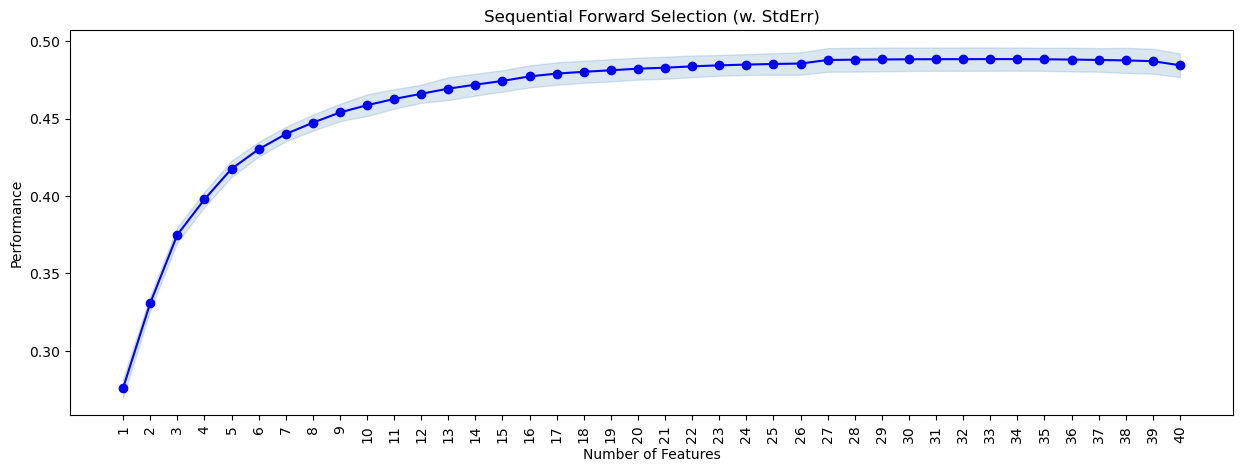

In [322]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

### Describe the results

Peak Performance of the model is between 27 and 38 features. After 38 features, the performance begins to taper.

In [325]:
reg = LinearRegression()

#Build step forward feature selection
sfs = SFS(
   reg,
   k_features=30,
   forward=True,
   floating=False,
   scoring="r2",
   n_jobs=-1,
   verbose=2,
   cv=5,
)

#Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished

[2024-10-31 13:29:38] Features: 1/30 -- score: 0.2761414854692584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  39 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.1s finished

[2024-10-31 13:29:38] Features: 2/30 -- score: 0.3308324962096793[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.1s finished

[2024-10-31 13:29:38] Features: 3/30 -- score: 0.37495195413088406[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.1s finished

[2024-10-31 13:29:38] Features: 4/30 -- score: 0.3

In [326]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 20, 21, 22, 24, 25, 26, 27, 29, 30, 31, 32, 35, 36, 39]


In [327]:
# let us look at the names of the important features
x_train.columns[feat_cols]

Index(['duration', 'years_running', 'studios_colab', 'contentWarn', 'watched',
       'watching', 'wantWatch', 'dropped', 'votes', 'tag_Based_on_a_Manga',
       'tag_Action', 'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Family_Friendly',
       'tag_Short_Episodes', 'tag_School_Life', 'tag_Shorts',
       'tag_Slice_of_Life', 'tag_Seinen', 'tag_Supernatural',
       'tag_Animal_Protagonists', 'tag_Ecchi', 'tag_Mecha',
       'tag_Based_on_a_Light_Novel', 'tag_Others', 'tag_missing',
       'encoded_studio_primary'],
      dtype='object')

**Now we will fit an sklearn model using these features only.**

In [329]:
x_train_final = x_train[x_train.columns[feat_cols]]

In [330]:
# Creating new x_test with the same 20 variables that we selected for x_train
# Jesse Note: I get 30 not 20 features
x_test_final = x_test[x_train_final.columns]

In [331]:
#Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

#let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
   np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
   index=x_train_final.columns.tolist() + ["Intercept"],
   columns=["Coefficients"],
)
print(coef_df)

                            Coefficients
duration                        0.004366
years_running                   0.039611
studios_colab                   0.049397
contentWarn                    -0.183712
watched                         0.000068
watching                        0.000082
wantWatch                       0.000175
dropped                        -0.000189
votes                          -0.000106
tag_Based_on_a_Manga            0.218830
tag_Action                      0.058241
tag_Fantasy                     0.122299
tag_Sci_Fi                      0.042023
tag_Shounen                     0.200175
tag_Non_Human_Protagonists      0.049571
tag_Drama                       0.262408
tag_Family_Friendly            -0.087245
tag_Short_Episodes             -0.398686
tag_School_Life                 0.079095
tag_Shorts                     -0.428201
tag_Slice_of_Life               0.194396
tag_Seinen                      0.137027
tag_Supernatural                0.102606
tag_Animal_Prota

In [332]:
#model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
   lin_reg_model2, x_train_final, y_train, 'LinReg Opt Train', results
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,Mean Squared Error,R-squared,Adj. R-squared,MAPE
0,0.586013,0.473666,0.343411,0.496871,0.495082,18.696702


In [333]:
#model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
   lin_reg_model2, x_test_final, y_test, 'LinReg Opt Test', results
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,Mean Squared Error,R-squared,Adj. R-squared,MAPE
0,0.5991,0.484852,0.358921,0.478496,0.47415,18.941354


- describe the results

In [335]:
#training performance comparison

models_train_comp_df = pd.concat(
   [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T],
   axis=1,
)

models_train_comp_df.columns = [
   "Linear Regression sklearn",
   "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.585473,0.586013
MAE,0.472898,0.473666
Mean Squared Error,0.342779,0.343411
R-squared,0.497796,0.496871
Adj. R-squared,0.495413,0.495082
MAPE,18.663846,18.696702


In [336]:
# test performance comparison

models_test_comp_df = pd.concat(
   [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T],
   axis=1,
)

models_test_comp_df.columns = [
   "Linear Regression sklearn",
   "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.597661,0.599100
MAE,0.483204,0.484852
Mean Squared Error,0.357198,0.358921
R-squared,0.480999,0.478496
Adj. R-squared,0.475216,0.474150
MAPE,18.878850,18.941354


* Describe the results comparing the two models

## Gradient Boosting Machines and Random Forest Regressor Models

In [339]:
def evaluate_and_update_results(model, X, y, dataset_type, results):
    """
    Evaluates a model's performance on a given dataset and updates the results.

    Parameters:
    - model: The trained model to evaluate.
    - X: The features of the dataset to evaluate the model on.
    - y: The true target values corresponding to X.
    - dataset_type: A string indicating the type of the dataset (e.g., "Training", "Test").
    - results: The list containing the results of model evaluations to be updated.
    """
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    adjr2 = adj_r2_score(X, y, y_pred)  # to compute adjusted R-squared
    mape = mape_score(y, y_pred)  # to compute MAPE
    '''
    print(f'Results on {dataset_type} Set')
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")
    '''
    new_data = {
        'Model': dataset_type,
        'R-Squared': r2,
        'Adj R-Squared': adjr2,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error': mae,
        'MAPE': mape
    }
    update_results(results, new_data)


In [340]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Initializing and training the model
gbm = GradientBoostingRegressor(n_estimators=800, learning_rate=0.1, 
                                max_depth=2, min_samples_split=2, 
                                min_samples_leaf=1, random_state=42)
gbm.fit(x_train, y_train)


GradientBoostingRegressor(max_depth=2, n_estimators=800, random_state=42)

In [341]:
# Evaluate GBM on the training set
evaluate_and_update_results(gbm, x_train, y_train, "GBM Train", results)
# Add a newline for readability
print()
# Evaluate GBM  on the test set
evaluate_and_update_results(gbm, x_test, y_test, "GBM Test", results)

In [342]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor
regr = RandomForestRegressor(n_estimators=500,  # Adjust the number of trees
                           max_depth=9,  # Adjust the maximum depth of the tree
                           min_samples_split=2,  # Minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
                           #max_features=10,  # The number of features to consider when looking for the best split
                           bootstrap=True,  # Whether bootstrap samples are used when building trees
                           random_state=42)

# Train the model using the training sets
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=500, random_state=42)

In [343]:
# Evaluate RandomForestRegressor on the training set
evaluate_and_update_results(regr, x_train, y_train, "Rand Forest Train", results)
# Add a newline for readability
print()
# Evaluate RandomForestRegressor on the test set
evaluate_and_update_results(regr, x_test, y_test, "Rand Forest Test", results)


#### Final Results of All Models

In [345]:
results_df = pd.DataFrame(results)

# Set the 'Model' column as the index if desired
results_df.set_index('Model', inplace=True)

# Display the results table
results_df.head(20)

,R-Squared,Adj R-Squared,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,MAPE
Model,,,,,,
LinReg Train,0.497796,0.495413,0.342779,0.585473,0.472898,18.663846
LinReg Test,0.480999,0.475216,0.357198,0.597661,0.483204,18.878850
LinReg Opt Train,0.496871,0.495082,0.343411,0.586013,0.473666,18.696702
LinReg Opt Test,0.478496,0.474150,0.358921,0.599100,0.484852,18.941354
GBM Train,0.774628,0.773559,0.153828,0.392208,0.302570,12.077751
GBM Test,0.720707,0.717595,0.192221,0.438430,0.336703,13.417357
Rand Forest Train,0.787654,0.786646,0.144937,0.380705,0.296768,11.825113
Rand Forest Test,0.687439,0.683957,0.215117,0.463807,0.362731,14.388689


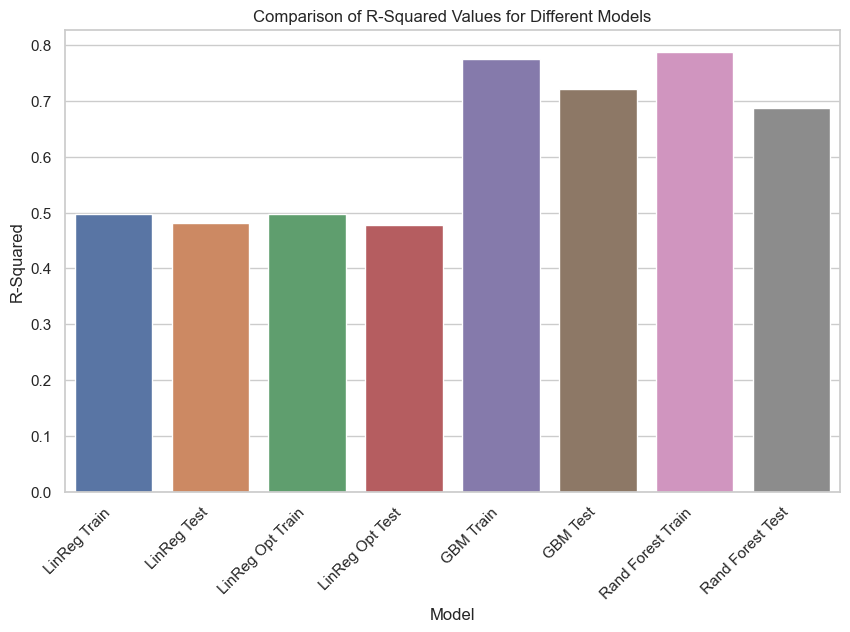

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results_df' is your DataFrame with the model results.

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a barplot for R-Squared values
plt.figure(figsize=(10, 6))  # You can adjust the size of the figure
barplot = sns.barplot(
    x=results_df.index,  # Model names on the x-axis
    y='R-Squared',  # R-Squared values on the y-axis
    data=results_df
)

# Rotate the x labels if they are too long
plt.xticks(rotation=45, ha="right")

# Set the title of the plot
plt.title('Comparison of R-Squared Values for Different Models')

# Display the plot
plt.show()


## Conclusions

#### NOTE: I worked for 3 hours trying to get x_test_final (the refined feature list) to work on the GBM and REGR models. There was nothing I could figure out to make this work.

#### Prediction:
- Our models attempt to predict the rating of anime films based on various data features, induding duration, votes, want-to-watch entries and so on. Ratings ranged from 0.844 to 4.702.

#### Important Note:
- Season of Release and Studio Primary are both features used in this model. There are many is_missing values in each of these features and these features should both be removed in an environment where is_missing will not be a persistant data feature/entry moving forward.

#### Best Models
- The most accurate models are the Random Forest Regressor (regr) and the Gradient Boosting Regressor (GBM). It took an amount of time adjusting the n_estimators and the max_depth to find a sweet spot where the models were not too overfit. Increasing n_estimators while decreasing max_depth proved to be an effective approach for tuning both. Ultimately, the Random Forest model was more prone to being overfit and slower to process as well.

#### Gradient Boosting
- The Gradient Boosting model was by far the faster of the 2 best models and was less prone to settings that were dramatically overfit.
Highest performance while not pushing into an extremely overfit model tended to hover around a 70-72% R-Squared Value and have a Mean Absolute Error of about 0.33 (Remember the total range is between 0.844 and 4.702)

#### Further Model Testing
- There are likely to be some accuracy gains in the realm of switching around the features sent to the models. With more time it might also be vaulable to set up some python loops that run through more parameter purmutations searching for the most tuned model. This

#### Alternate Model
- Finally searching for other models entirely might be a better solution than spending too much time adjusting hyper parameters on the current models in this notebook.
